# IMPORTACIÓN LIBRERIAS


In [1]:
import numpy as np
import pandas as pd
from math import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# CARGA DE ARCHIVOS

In [2]:
def load_dataset(file_path, file_type=None, separator=None, encoding='utf-8', **kwargs):
    """
    Loads a dataset in different formats, with support for custom separators, encoding, and more options.
    """
    # If the file type is not specified, infer from file extension
    if not file_type:
        file_type = file_path.split('.')[-1].lower()

    # Load according to the file type
    if file_type == 'csv':
        return pd.read_csv(file_path, sep=separator or ',', encoding=encoding, **kwargs)
    elif file_type in ['xls', 'xlsx']:
        return pd.read_excel(file_path, **kwargs)
    elif file_type == 'json':
        return pd.read_json(file_path, encoding=encoding, **kwargs)
    else:
        raise ValueError(f"File format '{file_type}' not supported. Use 'csv', 'excel', or 'json'.")

In [3]:
economia = load_dataset('../data/Economia per persona 01.09.2024 a 01.09.2025.xlsx')

#### CONVERTIR COLUMNAS Y FILAS

In [4]:
def preparar_datos_iniciales(df: pd.DataFrame, columnas_a_eliminar: list,   columnas_a_renombrar: dict,
    columnas_numericas: list, columnas_fechas: list) -> pd.DataFrame:
    """
    Prepara un DataFrame para análisis exploratorio de datos (EDA).
    
    Parámetros:
        df (pd.DataFrame): DataFrame original
        columnas_a_eliminar (list): Columnas que se eliminarán del DataFrame
        columnas_a_renombrar (dict): Diccionario con columnas a renombrar {original: nuevo_nombre}
        columnas_numericas (list): Columnas que deben convertirse a tipo numérico
        columnas_fechas (list): Columnas que deben convertirse a tipo datetime
    
    Retorna:
        pd.DataFrame: DataFrame transformado
    """
    df_eda = df.copy()

    # Eliminar columnas
    df_eda.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

    # Renombrar columnas
    df_eda.rename(columns=columnas_a_renombrar, inplace=True)

    # Conversión de columnas numéricas
    for col in columnas_numericas:
        if col in df_eda.columns:
            df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

    # Conversión de columnas de fecha
    for col in columnas_fechas:
        if col in df_eda.columns:
            df_eda[col] = pd.to_datetime(df_eda[col], errors='coerce', dayfirst=True)

    return df_eda

In [5]:
columnas_a_eliminar = ['IdRemesa', 'FormaPagoMetálicoCantidad','FormaPagoMetálicoImporte','FormaPagoRecibo_domiciliadoCantidad', 
        'FormaPagoRecibo_domiciliadoImporte', 'FormaPagoTarjeta_créditoCantidad','FormaPagoTarjeta_créditoImporte',
         'FormaPago_Transf_HortaEsportivaCantidad','FormaPago_Transf_HortaEsportivaImporte', 'TotalCantidad', 'TotalImporte']

columnas_a_renombrar = {'IdUsuario': 'IdPersona','FormaPagoMetálicoImporteCobrado': 'PagoMetálico','FormaPagoRecibo_domiciliadoImporteCobrado': 'PagoRecibo',
    'FormaPagoTarjeta_créditoImporteCobrado': 'PagoTarjeta','FormaPago_Transf_HortaEsportivaImporteCobrado': 'PagoTransferencia',  'TotalImporteCobrado': 'TotalCobrado'}

columnas_numericas = ['PagoMetálico',
       'PagoRecibo', 'PagoTarjeta', 'PagoTransferencia', 'TotalCobrado']
columnas_fechas = ['FechaRenovacion']

economia_eda = preparar_datos_iniciales(economia, columnas_a_eliminar, columnas_a_renombrar,
    columnas_numericas,   columnas_fechas)

In [6]:
economia_eda['IdPersona'] = economia_eda['IdPersona'].astype(str)

In [7]:
def eda_basica(df: pd.DataFrame, nombre_df: str = "DataFrame") -> None:
    """
    Realiza un análisis exploratorio básico sobre un DataFrame:
    - Identifica variables numéricas y categóricas
    - Detecta valores nulos y muestra una visualización si los hay
    - Revisa duplicados (filas y columnas)

    Parámetros:
        df (pd.DataFrame): El DataFrame a analizar
        nombre_df (str): Nombre para mostrar del DataFrame (opcional)
    """
    print(f"\n📋 Análisis EDA básico de: {nombre_df}")

    # 1. Tipos de variables
    print("\n📌 Tipos de Variables:")
    num_vbles = df.select_dtypes(include='number').columns.tolist()
    cat_vbles = df.select_dtypes(exclude='number').columns.tolist()
    print(f"🔢 Variables Numéricas: {num_vbles}")
    print(f"🔠 Variables Categóricas: {cat_vbles}")

    # 2. Valores nulos
    print("\n🕳️ Variables con valores nulos:")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    missing_percentage = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Total Missing': missing,
        'Percentage Missing': missing_percentage
    })

    if not missing.empty:
        display(missing_df)
        plt.figure(figsize=(10, 6))
        missing.plot(kind='barh', color='salmon')
        plt.title("Variables con Valores Nulos")
        plt.xlabel("Cantidad de valores nulos")
        plt.gca().invert_yaxis()
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("✅ No hay valores nulos en el dataset.")

    # 3. Filas duplicadas
    print("\n📎 Filas duplicadas:")
    duplicadas = df.duplicated().sum()
    if duplicadas > 0:
        print(f"🔴 Hay {duplicadas} filas duplicadas.")
        display(df[df.duplicated()])
    else:
        print("✅ No hay filas duplicadas.")

    # 4. Columnas duplicadas
    print("\n📎 Columnas duplicadas:")
    columnas_duplicadas = df.T.duplicated().sum()
    if columnas_duplicadas > 0:
        print(f"🔴 Hay {columnas_duplicadas} columnas duplicadas.")
    else:
        print("✅ No hay columnas duplicadas.")


📋 Análisis EDA básico de: Clientes Economia

📌 Tipos de Variables:
🔢 Variables Numéricas: ['PagoMetálico', 'PagoRecibo', 'PagoTarjeta', 'PagoTransferencia', 'TotalCobrado']
🔠 Variables Categóricas: ['IdPersona', 'FechaRenovacion', 'TipoAbono']

🕳️ Variables con valores nulos:


,Total Missing,Percentage Missing
PagoTransferencia,56962,99.984202
PagoTarjeta,56156,98.569448
PagoMetálico,49303,86.540521
PagoRecibo,8492,14.905829


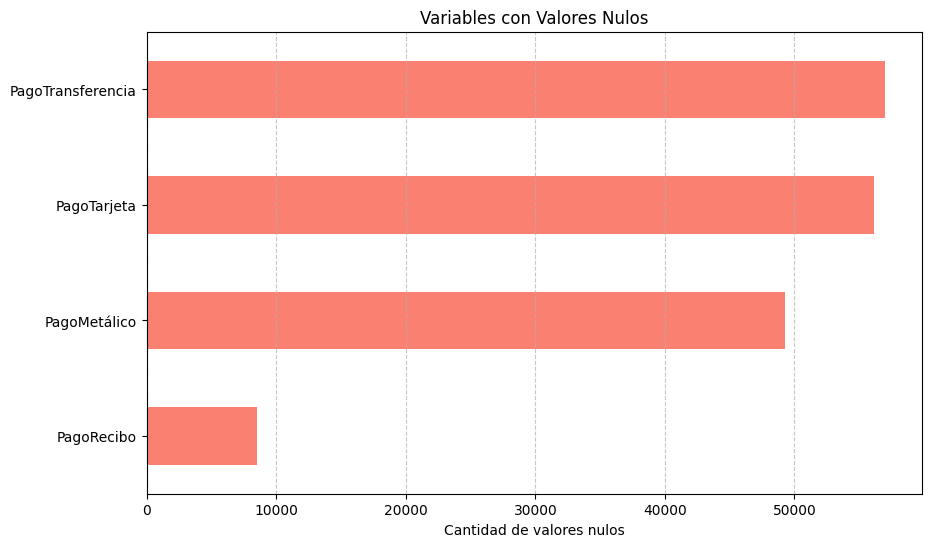


📎 Filas duplicadas:
🔴 Hay 1 filas duplicadas.


,IdPersona,FechaRenovacion,TipoAbono,PagoMetálico,PagoRecibo,PagoTarjeta,PagoTransferencia,TotalCobrado
7364,47161,2025-08-01,EMP1 - EMPLEATS D'ALTRES EMPRESES,0.0,NaN,NaN,NaN,0.0



📎 Columnas duplicadas:
✅ No hay columnas duplicadas.


In [8]:
eda_basica(economia_eda, nombre_df="Clientes Economia")

Al tener esa fila duplicada y sabiendo que eliminaremos como en los otros casos los abonados con esta tipologia de abono no nos importa tratarlo ahora mismo.

Se entiende que la mayoria de nulos es porque hay datos faltantes en las columnas, interpretando el dataframe es que si no hay dato es un 0, es decir no hay pago por parte del cliente. 

Se substituyen los nan por un 0


In [9]:
economia_eda= economia_eda.fillna(0)
economia_eda.isnull().sum()

IdPersona            0
FechaRenovacion      0
TipoAbono            0
PagoMetálico         0
PagoRecibo           0
PagoTarjeta          0
PagoTransferencia    0
TotalCobrado         0
dtype: int64

#### -FEATURE ENGINEERING 

Se realiza como en el archivo de abonados una pequeño filtro. Se excluyen los abonados que se han dado de baja que no forman parte y no interfieren directamente al numero de socios. Tal como los abonados con abonos antiguos, que no pagan, y también empleados del gimnasio.

In [10]:
def excluir_valores(df: pd.DataFrame, columna: str, valores_a_excluir: list) -> pd.DataFrame:
    """
    Filtra un DataFrame excluyendo las filas que contienen ciertos valores en una columna específica.

    Parámetros:
        df (pd.DataFrame): DataFrame original
        columna (str): Nombre de la columna en la que se aplicará el filtro
        valores_a_excluir (list): Lista de valores que se quieren excluir

    Retorna:
        pd.DataFrame: DataFrame filtrado, sin los valores excluidos y con índice reseteado
    """
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    df_filtrado = df[~df[columna].isin(valores_a_excluir)].reset_index(drop=True)
    return df_filtrado

In [11]:
tipos_a_excluir = ["EMP0 - EMPLEADOS CLUB SIN CUOTA", "EMP1 - EMPLEATS D'ALTRES EMPRESES", "CL02 - SOCIS NUMERARIS", "CL01 - SOCIS D'HONOR", "AA0 - PROMO 9'90€ (PRIMER MES)", "(nulo)"]
economia_eda_filtrado= excluir_valores(economia_eda, 'TipoAbono', tipos_a_excluir)

In [12]:
df_features = economia_eda_filtrado.copy()

In [13]:
df_features = df_features.sort_values(['IdPersona', 'FechaRenovacion'])
df_features

,IdPersona,FechaRenovacion,TipoAbono,PagoMetálico,PagoRecibo,PagoTarjeta,PagoTransferencia,TotalCobrado
19098,100013,2025-09-01,AA00 - ADULTS ( 26 A 64 ANYS ),0.0,59.95,0.0,0.0,59.95
19099,100037,2024-10-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,31.60,0.0,0.0,31.60
19100,100037,2024-11-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,31.60,0.0,0.0,31.60
19101,100037,2024-12-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,31.60,0.0,0.0,31.60
19102,100037,2025-01-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,32.85,0.0,0.0,32.85
...,...,...,...,...,...,...,...,...
19093,99999,2025-05-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,32.85,0.0,0.0,32.85
19094,99999,2025-06-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,32.85,0.0,0.0,32.85
19095,99999,2025-07-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,32.85,0.0,0.0,32.85
19096,99999,2025-08-01,AR00 - TARJA ROSA (TARJETA GRATUÏTA),0.0,32.85,0.0,0.0,32.85


In [ ]:
def agregar_features_economia(usuario_df: pd.DataFrame) -> pd.Series:
    """
    Calcula las características económicas por usuario (IdPersona) a partir de su historial de pagos.
    """

    fechas = usuario_df['FechaRenovacion'].sort_values()
    intervalos = fechas.diff().dt.days / 30  # Diferencia en meses aproximados

    # Calcular media y desviación estándar del intervalo entre pagos
    media_intervalo = intervalos.mean() if not intervalos.empty else 0.0
    std_intervalo = intervalos.std() if not intervalos.empty else 0.0

    total_pagado = usuario_df['TotalCobrado'].sum()

    # Sumar los distintos métodos de pago
    pagos = usuario_df[['PagoMetálico', 'PagoRecibo', 'PagoTarjeta', 'PagoTransferencia']].sum()

    # Estadísticas sobre el pago total
    media_pago = usuario_df['TotalCobrado'].mean()
    std_pago = usuario_df['TotalCobrado'].std()
    
    # Coeficiente de variación del pago
    coef_var_pago = std_pago / media_pago if (media_pago and not pd.isna(media_pago)) else 0.0

    # Abono más frecuente
    modo_abono = usuario_df['TipoAbono'].mode()
    abono_mas_frecuente = modo_abono.iloc[0] if not modo_abono.empty else None

    # Cálculo de meses únicos con pago
    meses_pagados = usuario_df['FechaRenovacion'].dt.to_period("M").nunique()
    porcentaje_meses_pagados = meses_pagados / 13  # Asumiendo 13 meses de historial

    return pd.Series({
        'NumPagosEconomia': len(usuario_df),
        'MediaIntervaloMeses': media_intervalo if not pd.isna(media_intervalo) else 0.0,
        'StdIntervaloMeses': std_intervalo if not pd.isna(std_intervalo) else 0.0,
        'UltimoPagoMesEconomia': fechas.max().month if not fechas.empty else 0,
        'PrimerPagoMesEconomia': fechas.min().month if not fechas.empty else 0,
        'MesesConPagoEconomia': meses_pagados,
        'PorcentajeMesesPagados': porcentaje_meses_pagados,
        'TotalPagadoEconomia': total_pagado,
        'media_pagoEconomia': media_pago if not pd.isna(media_pago) else 0.0,
        'StdPagoEconomia': std_pago if not pd.isna(std_pago) else 0.0,
        'CoefVarPagoEconomia': coef_var_pago,
        'PctPagoMetalico': pagos['PagoMetálico'] / total_pagado if total_pagado else 0.0,
        'PctPagoRecibo': pagos['PagoRecibo'] / total_pagado if total_pagado else 0.0,
        'PctPagoTarjeta': pagos['PagoTarjeta'] / total_pagado if total_pagado else 0.0,
        'PctPagoTransferencia': pagos['PagoTransferencia'] / total_pagado if total_pagado else 0.0,
        'NumAbonosDistintos': usuario_df['TipoAbono'].nunique(),
        'AbonoMasRecuente': abono_mas_frecuente,
        
    })

In [17]:
df_features = df_features.sort_values(['IdPersona', 'FechaRenovacion'])
df_features_economia = df_features.groupby('IdPersona').apply(agregar_features_economia).reset_index()
df_features_economia['TienePagos'] = True

Se observan posibles valores nulos. Se gestiona.

In [18]:
df_features_economia= df_features_economia.fillna(0)
df_features_economia

,IdPersona,NumPagosEconomia,MediaIntervaloMeses,StdIntervaloMeses,UltimoPagoMesEconomia,PrimerPagoMesEconomia,MesesConPagoEconomia,PorcentajeMesesPagados,TotalPagadoEconomia,media_pagoEconomia,StdPagoEconomia,CoefVarPagoEconomia,PctPagoMetalico,PctPagoRecibo,PctPagoTarjeta,PctPagoTransferencia,NumAbonosDistintos,AbonoMasRecuente,TienePagos
0,100013,1,0.000000,0.00000,9,9,1,0.076923,59.95,59.950000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1,AA00 - ADULTS ( 26 A 64 ANYS ),True
1,100037,12,1.015152,0.03114,9,10,12,0.923077,319.65,26.637500,10.498596,0.394128,0.0,1.000000,0.000000,0.0,2,AR00 - TARJA ROSA (TARJETA GRATUÏTA),True
2,100043,12,1.015152,0.03114,9,10,12,0.923077,559.20,46.600000,0.542720,0.011646,0.0,0.918276,0.081724,0.0,1,JO00 - QUOTA DESCOMPTE JOVE (DE 18 A 25 ANYS),True
3,100060,12,1.015152,0.03114,9,10,12,0.923077,712.50,59.375000,1.040214,0.017519,0.0,1.000000,0.000000,0.0,1,AA00 - ADULTS ( 26 A 64 ANYS ),True
4,100062,12,1.015152,0.03114,9,10,12,0.923077,458.70,38.225000,0.678401,0.017748,0.0,1.000000,0.000000,0.0,1,AG00 - GENT GRAN (MES DE 65 ANYS),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,99962,12,1.015152,0.03114,9,10,12,0.923077,1039.42,86.618333,36.180096,0.417696,0.0,0.000000,1.000000,0.0,2,FAMILIAR (PARES MES ELS MENORS DE 18 ANYS),True
7146,99983,2,1.033333,0.00000,11,10,2,0.153846,74.20,37.100000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1,AG00 - GENT GRAN (MES DE 65 ANYS),True
7147,99985,12,1.015152,0.03114,9,10,12,0.923077,458.70,38.225000,0.678401,0.017748,0.0,1.000000,0.000000,0.0,1,AG00 - GENT GRAN (MES DE 65 ANYS),True
7148,99997,12,1.015152,0.03114,9,10,12,0.923077,458.70,38.225000,0.678401,0.017748,0.0,1.000000,0.000000,0.0,1,AG00 - GENT GRAN (MES DE 65 ANYS),True


# GUARDAMOS DATAFRAME RESULTANTE 

Ese dataframe se guarda para reutilizarse posteriormente para crear el archivo final para el modelo. Se guarda en formato CSV.

Comentario: Faltan criterios de preparación del dataframe para el modelo, se hace posteriormente en el notebook de archivo final

In [19]:
# Guardar el DataFrame en un archivo CSV
df_features_economia.to_csv('../data/economia_final_pre_modelo.csv', index=False)